In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS

import matplotlib.pyplot as plt
import numpy as np

## Muse NGC-1068

http://archive.eso.org/scienceportal/home (2014-11-15 00:33:43)


In [18]:
with fits.open("ngc1068-muse.fits") as hdu_list:
    print(hdu_list.info())
    data = hdu_list[1].data

    wcs = WCS(hdu_list[1].header)
    print(wcs)


Filename: ngc1068-muse.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1327   ()      
  1  DATA          1 ImageHDU        43   (691, 693, 3681)   float32   
  2  STAT          1 ImageHDU        43   (691, 693, 3681)   float32   


None
WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'AWAV'  
CRVAL : 40.678073  -0.01615  4.74987548828125e-07  
CRPIX : 204.125653932325  274.875964887678  1.0  
CD1_1 CD1_2 CD1_3  : -5.55555555555556e-05  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  5.55555555555556e-05  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  1.25e-10  
NAXIS : 691  693  3681


In [19]:
len(data)

3681

In [204]:
# Add RA and DEC
sky_coords = wcs.pixel_to_world(events['x'], events['y'])
events['ra'] = sky_coords.ra
events['dec'] = sky_coords.dec

print(events.info())

<Table length=39933>
  name    dtype  shape  unit    class    
-------- ------- ------ ---- ------------
    time float64           s       Column
   expno   int32                   Column
  ccd_id   int16                   Column
 node_id   int16                   Column
   chipx   int16         pix       Column
   chipy   int16         pix       Column
   tdetx   int16         pix MaskedColumn
   tdety   int16         pix MaskedColumn
    detx float32         pix       Column
    dety float32         pix       Column
       x float32         pix       Column
       y float32         pix       Column
    phas   int16 (5, 5)  adu       Column
     pha   int32         adu MaskedColumn
  pha_ro   int32         adu MaskedColumn
  energy float32          eV       Column
      pi   int32        chan MaskedColumn
fltgrade   int16                   Column
   grade   int16                   Column
  status    bool  (32,)            Column
      ra float64         deg       Column
     dec floa

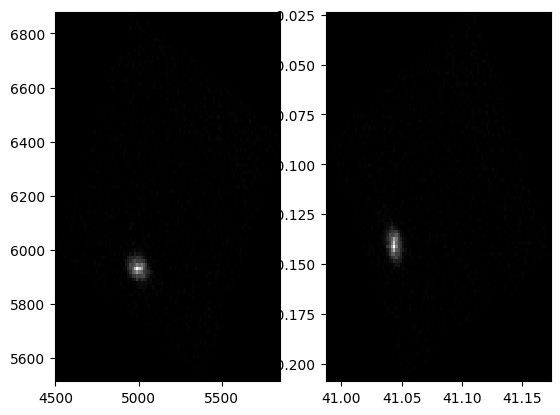

In [218]:
mask = events['ccd_id'] == 9

events_filtered = events[mask]

#plt.hist2d(ra, dec, bins=(100, 100), cmap='gray')
x, y = events_filtered['x'], events_filtered['y']
ra, dec = events_filtered['ra'], events_filtered['dec']
#plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2)
z1 = ax1.hist2d(x, y, bins=(100, 100), cmap='gray')
z2 = ax2.hist2d(ra, dec, bins=(100, 100), cmap='gray')
plt.show()


In [30]:
print(events['tdetx'])

tdetx
 pix 
-----
 1738
  878
 4720
 4618
 4138
 4154
 4643
 3923
 4710
 4745
  ...
 2472
 2284
 2538
 2234
 2453
 2146
 2362
 2804
 1908
 2094
Length = 39933 rows


## MUSE NGC-1068
MUSE - WALCHER, C.J.